#Resnet Week 7 Improving the Model

Data: PIC_NUMBER = 50, THRESHOLD = 100

Runtime: changed runtime type to GPU

Files setting: Mount to Google Drive

In [1]:
# IMPORTANT
# for compatible torch, otherwise would have to directly edit the fastai files 
# as shown here: https://forums.fast.ai/t/fastai-throwing-a-runtime-error-when-using-custom-train-test-sets/70262/6
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 52.8MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [2]:
# if not done so, mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# first, unzip the uploaded file
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/My Drive/Junior Year/CS121/data/small_50_100_data.zip', 'r')
directory_to_extract_to = '/content/drive/My Drive/Junior Year/CS121/data/art'
zip_ref.extractall(directory_to_extract_to)
zip_ref.close()

In [3]:
# now, find all the classes real quick
import os

data_dir = '/content/drive/My Drive/Junior Year/CS121/data/art/small_50_100_data'
classes = [x[0].replace(data_dir+"/",'') for x in os.walk(data_dir)]

print(classes)
# for mine the first and last part of the list were weird lol
# classes = classes[1:-1]
# for yours probably (hopefully) only the first is weird, because it is the name of the folder itself
classes = classes[1:]
print(classes)

['/content/drive/My Drive/Junior Year/CS121/data/art/small_50_100_data', 'Abstract Art', 'Abstract Expressionism', 'Academicism', 'Art Deco', 'Art Informel', 'Art Nouveau (Modern)', 'Baroque', 'Color Field Painting', 'Concretism', 'Cubism', 'Early Renaissance', 'Expressionism', 'Fauvism', 'High Renaissance', 'Impressionism', 'Ink and wash painting', 'Lyrical Abstraction', 'Magic Realism', 'Mannerism (Late Renaissance)', 'Naïve Art (Primitivism)', 'Naturalism', 'Neoclassicism', 'Neo-Romanticism', 'Northern Renaissance', 'Op Art', 'Pointillism', 'Pop Art', 'Post-Impressionism', 'Realism', 'Rococo', 'Romanticism', 'Sosaku hanga', 'Surrealism', 'Symbolism', 'Tachisme', 'Ukiyo-e', 'models']
['Abstract Art', 'Abstract Expressionism', 'Academicism', 'Art Deco', 'Art Informel', 'Art Nouveau (Modern)', 'Baroque', 'Color Field Painting', 'Concretism', 'Cubism', 'Early Renaissance', 'Expressionism', 'Fauvism', 'High Renaissance', 'Impressionism', 'Ink and wash painting', 'Lyrical Abstraction', '

In [4]:
import fastai
from fastai.vision import *

In [5]:
import fastai
from fastai.vision import *

# remove bad images
for c in classes:
    print(c)
    verify_images(data_dir+"/"+c, delete=True, max_size = 500)

Abstract Art


Abstract Expressionism


Academicism


Art Deco


Art Informel


Art Nouveau (Modern)


Baroque


Color Field Painting


Concretism


Cubism


Early Renaissance


Expressionism


Fauvism


High Renaissance


Impressionism


Ink and wash painting


Lyrical Abstraction


Magic Realism


Mannerism (Late Renaissance)


Naïve Art (Primitivism)


Naturalism


Neoclassicism


Neo-Romanticism


Northern Renaissance


Op Art


Pointillism


Pop Art


Post-Impressionism


Realism


Rococo


Romanticism


Sosaku hanga


Surrealism


Symbolism


Tachisme


Ukiyo-e


models


In [6]:
# create the data bunch!

import numpy
np.random.seed(42)
data = ImageDataBunch.from_folder(data_dir, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=16, num_workers=4).normalize(imagenet_stats)

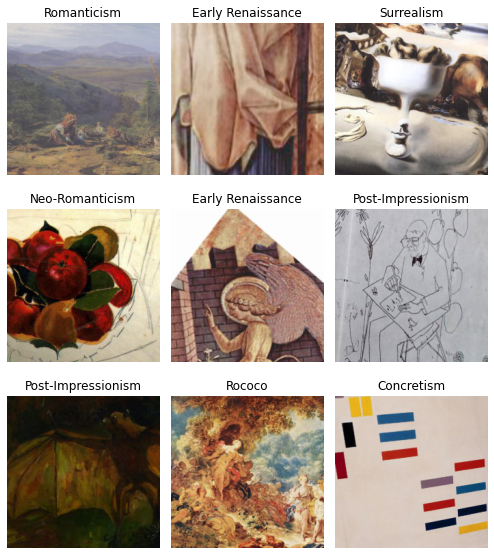

In [ ]:
# data.show_batch(rows=3, figsize=(7,8))


In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Abstract Art',
  'Abstract Expressionism',
  'Academicism',
  'Art Deco',
  'Art Informel',
  'Art Nouveau (Modern)',
  'Baroque',
  'Color Field Painting',
  'Concretism',
  'Cubism',
  'Early Renaissance',
  'Expressionism',
  'Fauvism',
  'High Renaissance',
  'Impressionism',
  'Ink and wash painting',
  'Lyrical Abstraction',
  'Magic Realism',
  'Mannerism (Late Renaissance)',
  'Naïve Art (Primitivism)',
  'Naturalism',
  'Neo-Romanticism',
  'Neoclassicism',
  'Northern Renaissance',
  'Op Art',
  'Pointillism',
  'Pop Art',
  'Post-Impressionism',
  'Realism',
  'Rococo',
  'Romanticism',
  'Sosaku hanga',
  'Surrealism',
  'Symbolism',
  'Tachisme',
  'Ukiyo-e'],
 36,
 1439,
 359)

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [12]:
learn.fit_one_cycle(20)


epoch,train_loss,valid_loss,error_rate,time
0,4.272345,3.034515,0.818942,00:26
1,3.261979,2.650890,0.696379,00:27
2,2.820158,2.965531,0.724234,00:26
3,2.520356,2.838171,0.671309,00:26
4,2.341296,2.879419,0.674095,00:27
5,2.151296,2.765701,0.668524,00:27
6,1.933562,2.694158,0.635098,00:26
7,1.867070,2.717390,0.651811,00:26
8,1.689877,2.788074,0.657382,00:26
9,1.450182,2.878582,0.646240,00:26


In [13]:
learn.save('stage-50_100-0')


In [16]:
learn.load('stage-50_100-0')
learn.export(file = "/content/drive/My Drive/Junior Year/CS121/models/stage-50_100-0.pkl")

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


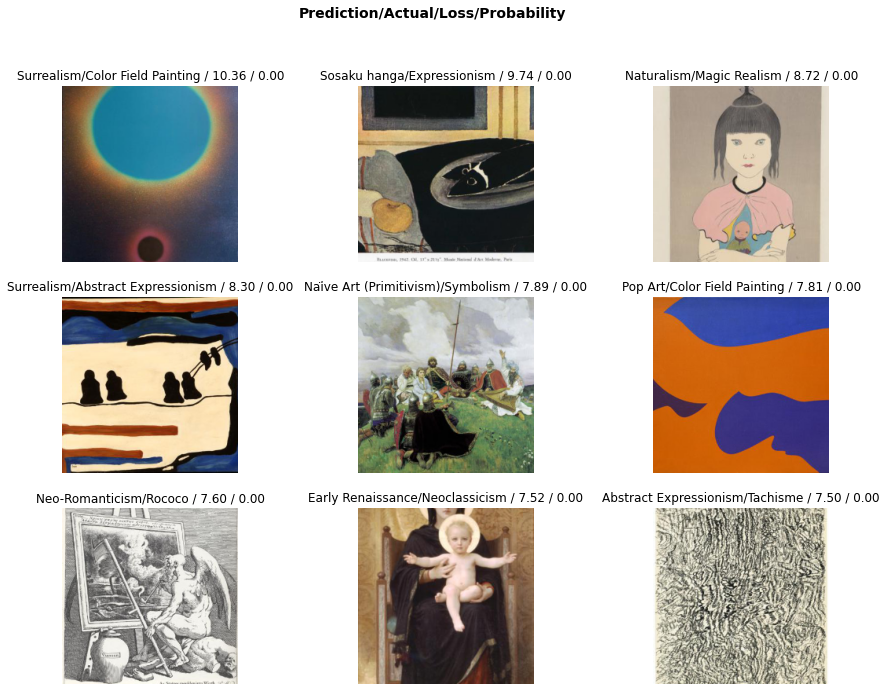

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))


In [ ]:
interp.most_confused(min_val=2)

#confusion matrix! Not sure helpful tho
interp.plot_confusion_matrix()



Improving the Model

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


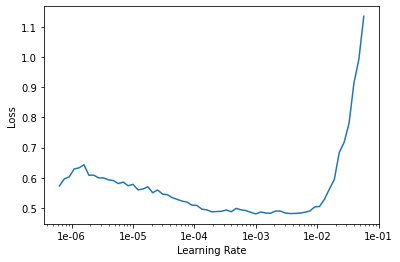

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.unfreeze()
# using new learning rate here
learn.fit_one_cycle(100,slice(1e-03,1e-02))
learn.save('stage-2')

epoch,train_loss,valid_loss,error_rate,time
0,1.522591,3.077036,0.651811,00:27
1,1.291813,3.013693,0.635098,00:27
2,1.255829,3.278427,0.651811,00:27
3,1.390663,3.461360,0.649025,00:27
4,1.672513,3.810153,0.727019,00:27
5,2.129293,4.020062,0.721448,00:27
6,2.453736,3.994138,0.743733,00:27
7,2.450039,3.148292,0.727019,00:27
8,2.616802,3.569926,0.802228,00:27
9,2.625755,6.669387,0.827298,00:27


In [ ]:
learn.unfreeze()
# using new learning rate here
learn.fit_one_cycle(20,slice(1e-04,5e-03))
learn.save('stage-3')

epoch,train_loss,valid_loss,error_rate,time
0,2.680803,3.270303,0.782730,00:27
1,2.685960,3.080517,0.779944,00:27
2,2.731047,3.066844,0.791086,00:27
3,2.742207,3.610098,0.782730,00:27
4,2.741068,2.689120,0.740947,00:27
5,2.763485,4.775772,0.760446,00:27
6,2.746700,3.494009,0.777159,00:27
7,2.745431,3.077862,0.766017,00:27
8,2.739942,3.134429,0.766017,00:27
9,2.676047,2.770728,0.746518,00:27


In [ ]:
learn.unfreeze()
# using new learning rate here
learn.fit_one_cycle(50,slice(1e-04,5e-03))
learn.save('stage-4')

epoch,train_loss,valid_loss,error_rate,time
0,2.286664,2.769566,0.707521,00:27
1,2.337876,2.918046,0.713092,00:28
2,2.274207,2.521139,0.727019,00:28
3,2.308166,2.575944,0.710306,00:28
4,2.290406,3.009967,0.707521,00:28
5,2.270806,4.450205,0.743733,00:27
6,2.296101,3.045394,0.738162,00:27
7,2.369948,4.287342,0.724234,00:28
8,2.393842,36.418507,0.752089,00:27
9,2.388057,2.467252,0.701950,00:27


In [ ]:
learn.load('stage-3')
learn.export(file = "/content/drive/My Drive/Junior Year/CS121/models/style-stage-3.pkl")

# ##Other Improvements for Week 7

Improving the Model by Choosing what styles to classify

1. Consolidating all "Renaissance" art: Early Renaissance, High Renaissance, Mannerism (Late Renaissance), and Northern Renaissance






In [ ]:
# how much does "renaissance" add to the total error?
new_folder = "Renaissance"

for c in classes:
  if "renaissance" in c.lower():
    # add all pictures into new Renaissance folder in drive
    # then remove the class
    classes.remove(c)
print(classes)



NameError: ignored

In [ ]:
# create the data bunch!

import numpy
np.random.seed(42)
data_r = ImageDataBunch.from_folder(data_dir, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=16, num_workers=4).normalize(imagenet_stats)

In [ ]:
learn_r = cnn_learner(data, models.resnet50, metrics=error_rate)

In [ ]:
learn_r.fit_one_cycle(10)
learn.save('stage-1')

In [ ]:
learn_r.unfreeze()
# using new learning rate here
learn_r.fit_one_cycle(20,slice(1e-03,1e-02))
learn_r.save('stage-2')

## More Ideas for Week 7

1. Considering the top losses and removing the style that is less prominent (ie the style with less examples from the original Kaggle data)

2. figure out a way to group similar vs distinct styles
